<a href="https://colab.research.google.com/github/Kanishk-blip/-git_test-/blob/main/Solar_Bird_Drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload archive (1).zip

import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("solar_dataset")

print("✅ Dataset extracted.")


Saving archive (1).zip to archive (1) (1).zip
✅ Dataset extracted.


In [3]:
import shutil
import glob

src_bird = "solar_dataset/Faulty_solar_panel/Bird-drop"
src_clean = "solar_dataset/Faulty_solar_panel/Clean"
target_dir = "processed_dataset_binary"

os.makedirs(f"{target_dir}/Bird_Dropping", exist_ok=True)
os.makedirs(f"{target_dir}/Clean_Panel", exist_ok=True)

for path in glob.glob(f"{src_bird}/**/*", recursive=True):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Bird_Dropping")

for path in glob.glob(f"{src_clean}/*"):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Clean_Panel")

print("✅ Data copied into training folders.")


✅ Data copied into training folders.


In [4]:
import shutil
import glob

src_bird = "solar_dataset/Faulty_solar_panel/Bird-drop"
src_clean = "solar_dataset/Faulty_solar_panel/Clean"
target_dir = "processed_dataset_binary"

os.makedirs(f"{target_dir}/Bird_Dropping", exist_ok=True)
os.makedirs(f"{target_dir}/Clean_Panel", exist_ok=True)

for path in glob.glob(f"{src_bird}/**/*", recursive=True):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Bird_Dropping")

for path in glob.glob(f"{src_clean}/*"):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Clean_Panel")

print("✅ Data copied into training folders.")


✅ Data copied into training folders.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "processed_dataset_binary",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "processed_dataset_binary",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

base_model = MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, validation_data=val_data, epochs=10)

model.save("bird_drop_detector.h5")
print("✅ Model trained and saved.")


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6189 - loss: 0.7724 - val_accuracy: 0.8861 - val_loss: 0.3140
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 573ms/step - accuracy: 0.8524 - loss: 0.3290 - val_accuracy: 0.8987 - val_loss: 0.2874
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 670ms/step - accuracy: 0.9065 - loss: 0.2362 - val_accuracy: 0.8987 - val_loss: 0.2270
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 630ms/step - accuracy: 0.9332 - loss: 0.1972 - val_accuracy: 0.8987 - val_loss: 0.2245
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 643ms/step - accuracy: 0.9535 - loss: 0.1376 - val_accuracy: 0.9494 - val_loss: 0.1845
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 688ms/step - accuracy: 0.9780 - loss: 0.0957 - val_accuracy: 0.9241 - val_loss: 0.1956
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 616ms/step - accuracy: 0.9729 - loss: 0.1033 - val_accuracy: 0.9367 - val_loss: 0.1934
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 566ms/step - accuracy: 0.9726 - loss: 0.0798 - val_accuracy: 0.96

✅ Model trained and saved.


In [6]:
import os
import glob
import shutil

# Source folders
original_data_bird = "processed_dataset_binary/Bird_Dropping"
original_data_clean = "processed_dataset_binary/Clean_Panel"

kaggle_data_bird = "/root/.cache/kagglehub/datasets/rppost/solar-panel/versions/1/Training/bird drop"
kaggle_data_clean = "/root/.cache/kagglehub/datasets/rppost/solar-panel/versions/1/Training/clean"

# Target folder
fine_tune_dir = "fine_tune_dataset"
os.makedirs(f"{fine_tune_dir}/Bird_Dropping", exist_ok=True)
os.makedirs(f"{fine_tune_dir}/Clean_Panel", exist_ok=True)

# Copy original data
for file in glob.glob(f"{original_data_bird}/*"):
    shutil.copy(file, f"{fine_tune_dir}/Bird_Dropping")

for file in glob.glob(f"{original_data_clean}/*"):
    shutil.copy(file, f"{fine_tune_dir}/Clean_Panel")

# Copy 200 images from Kaggle
for file in glob.glob(f"{kaggle_data_bird}/*")[:200]:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(file, f"{fine_tune_dir}/Bird_Dropping")

for file in glob.glob(f"{kaggle_data_clean}/*")[:200]:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(file, f"{fine_tune_dir}/Clean_Panel")

# Confirm
print("✅ Fine-tune dataset ready.")
print("Bird Dropping:", len(os.listdir(f'{fine_tune_dir}/Bird_Dropping')))
print("Clean Panel:", len(os.listdir(f'{fine_tune_dir}/Clean_Panel')))


✅ Fine-tune dataset ready.
Bird Dropping: 207
Clean Panel: 193


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8255 - loss: 0.6652 - val_accuracy: 0.6962 - val_loss: 1.9288
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 959ms/step - accuracy: 0.8883 - loss: 0.2942 - val_accuracy: 0.6835 - val_loss: 2.3532
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 878ms/step - accuracy: 0.9348 - loss: 0.1511 - val_accuracy: 0.8228 - val_loss: 1.5755
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 907ms/step - accuracy: 0.9727 - loss: 0.0900 - val_accuracy: 0.9241 - val_loss: 0.6017
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 960ms/step - accuracy: 0.9969 - loss: 0.0382 - val_accuracy: 0.7848 - val_loss: 2.3956


✅ Fine-tuned model saved as bird_drop_finetuned.h5


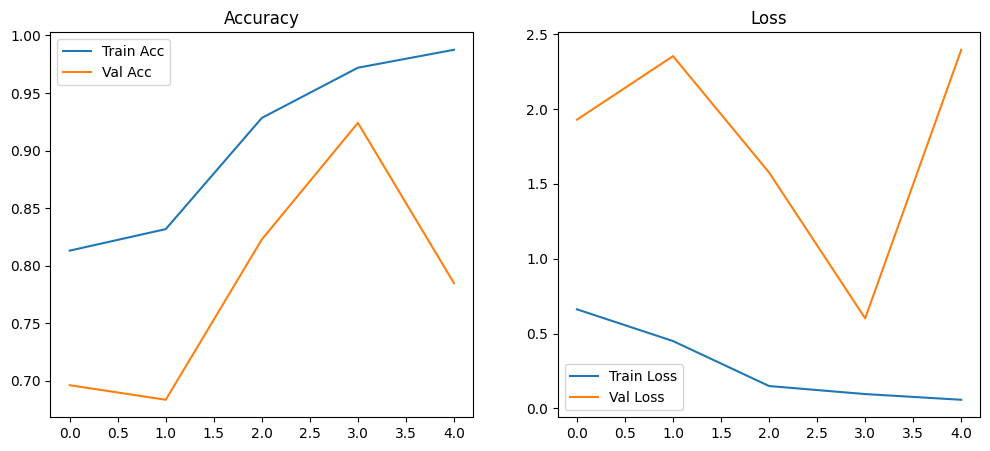

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# STEP 1: Load the pretrained model
model = load_model("bird_drop_detector.h5")

# STEP 2: Unfreeze last 30 layers of MobileNetV2
base_model = model.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# STEP 3: Recompile with new trainable layers
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 4: Set up fine-tuning data generators
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "fine_tune_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "fine_tune_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# STEP 5: Fine-tune the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# STEP 6: Save the fine-tuned model
model.save("bird_drop_finetuned.h5")
print("✅ Fine-tuned model saved as bird_drop_finetuned.h5")

# STEP 7: Plot training and validation metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


Saving 1_aug_0.png to 1_aug_0.png
Saving 1_aug_1.png to 1_aug_1.png
Saving 1_aug_2.png to 1_aug_2.png
Saving 2_aug_2.png to 2_aug_2.png
Saving 5_original.png to 5_original.png
Saving 6_aug_2.png to 6_aug_2.png
Saving 6_original.png to 6_original.png
Saving 7_aug_2.png to 7_aug_2.png
Saving 9.png to 9.png
Saving 10.png to 10.png
Saving 11.png to 11.png
Saving 12.png to 12.png
Saving 14_aug_0.png to 14_aug_0.png
Saving 14_aug_1.png to 14_aug_1.png
Saving 14_aug_2.png to 14_aug_2.png
Saving 15.png to 15.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


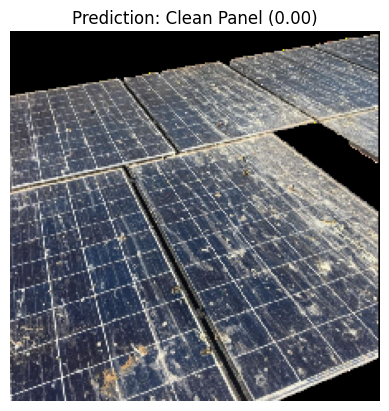

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


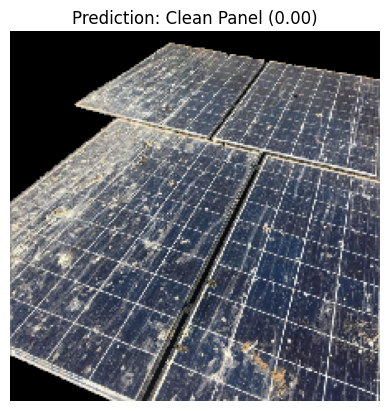

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


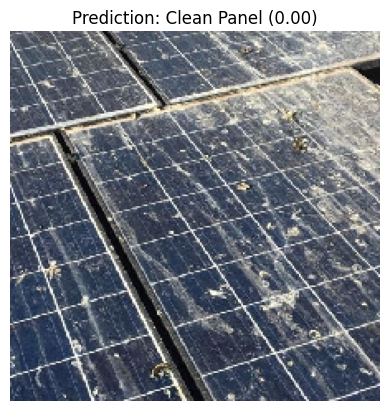

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


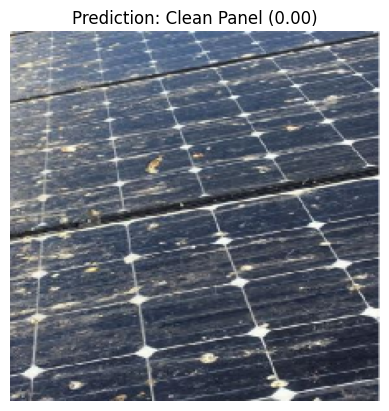

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


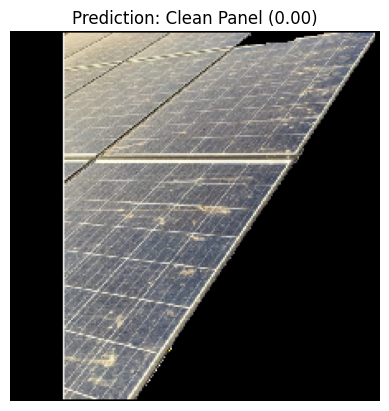

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


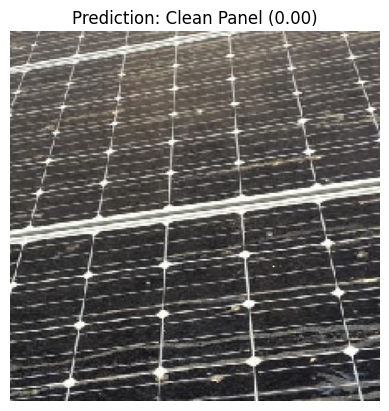

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


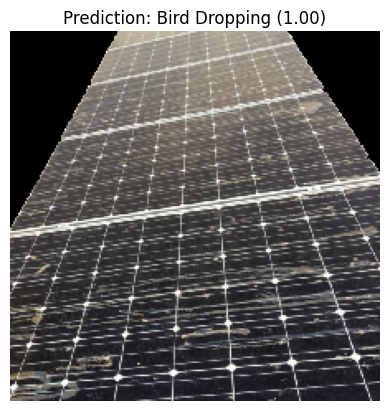

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


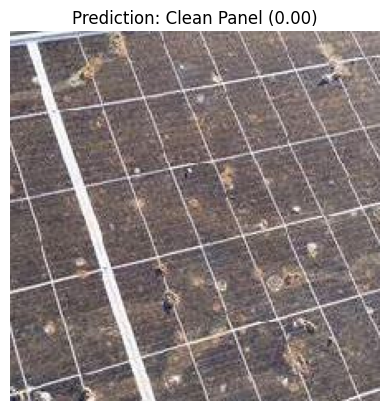

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


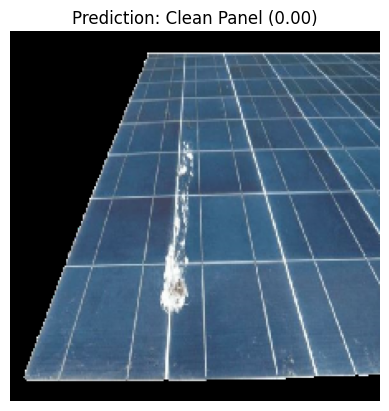

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


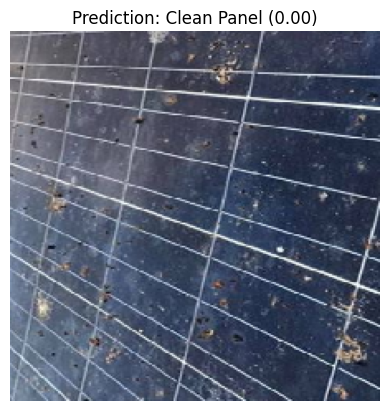

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


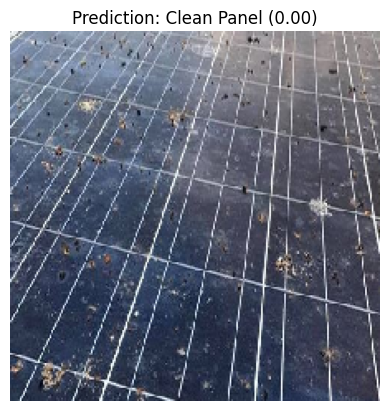

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


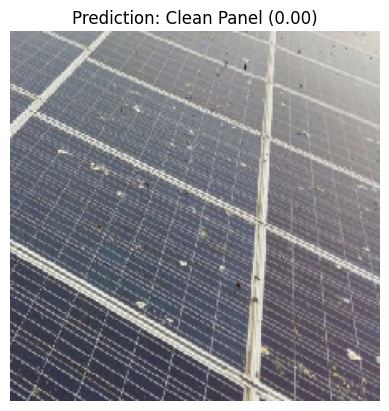

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


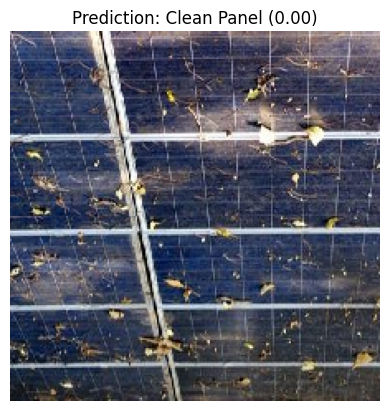

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


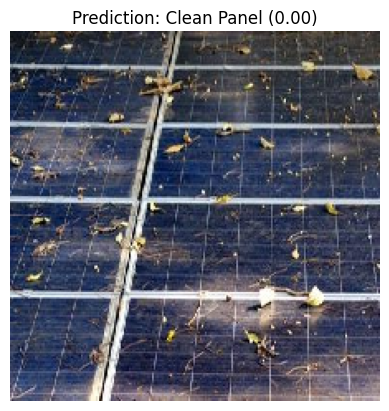

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


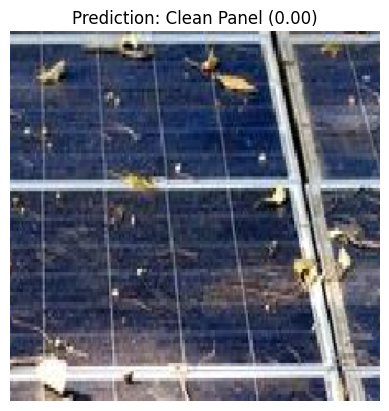

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


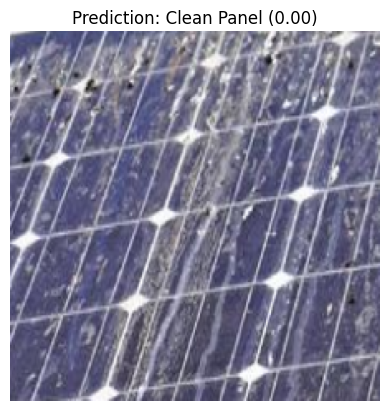

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# Load the fine-tuned model
model = load_model("bird_drop_finetuned.h5")

# Upload image files
uploaded = files.upload()

# Display + predict
for fname in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)[0][0]
    label = "Bird Dropping" if pred > 0.5 else "Clean Panel"

    # Show result
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({pred:.2f})")
    plt.axis("off")
    plt.show()


In [10]:
for fname in uploaded.keys():
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    label = "Bird Dropping" if pred > 0.5 else "Clean Panel"
    print(f"{fname}: {label} (confidence: {pred:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1_aug_0.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1_aug_1.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1_aug_2.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2_aug_2.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5_original.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6_aug_2.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6_original.png: Bird Dropping (confidence: 0.9998)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
7_aug_2.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
9.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
10.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
11.png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
12.png: Clean Panel (confidence: 0.0000)
1/1 ━

In [11]:
import shutil
import os

# Location of uploaded test images
test_failures_dir = "/content/failure_examples"  # Or wherever you uploaded them

# Make sure training target exists
target_dir = "fine_tune_dataset/Bird_Dropping"
os.makedirs(target_dir, exist_ok=True)

# Copy selected images into Bird_Dropping folder
failed_images = [
    "1_aug_0.png", "1_aug_1.png", "1_aug_2.png", "2_aug_2.png", "5_original.png",
    "6_aug_2.png", "7_aug_2.png", "9.png", "10.png", "11.png", "12.png",
    "14_aug_0.png", "14_aug_1.png", "14_aug_2.png", "15.png"
]

for fname in failed_images:
    src = os.path.join(test_failures_dir, fname)
    dst = os.path.join(target_dir, fname)
    if os.path.exists(src):
        shutil.copy(src, dst)

print(f"✅ {len(failed_images)} test images added to training set.")


✅ 15 test images added to training set.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "fine_tune_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "fine_tune_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import load_model

model = load_model("bird_drop_finetuned.h5")  # Or the detector file if not fine-tuned before

# Optional: unfreeze base layers again if needed
base_model = model.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with updated data
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

model.save("bird_drop_retrained.h5")
print("✅ Model retrained and saved as bird_drop_retrained.h5")


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9636 - loss: 0.1124 - val_accuracy: 0.8608 - val_loss: 3.9091
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 966ms/step - accuracy: 0.9655 - loss: 0.1308 - val_accuracy: 0.8987 - val_loss: 2.2714
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 895ms/step - accuracy: 0.9610 - loss: 0.0907 - val_accuracy: 0.8101 - val_loss: 5.2614
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 899ms/step - accuracy: 0.9648 - loss: 0.1180 - val_accuracy: 0.7342 - val_loss: 5.6120
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 936ms/step - accuracy: 0.9512 - loss: 0.1693 - val_accuracy: 0.8734 - val_loss: 3.4530


✅ Model retrained and saved as bird_drop_retrained.h5


In [14]:
model = load_model("bird_drop_retrained.h5")


In [15]:
# Unfreeze last 30 layers (again, if needed)
base_model = model.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Re-compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune on updated data
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# Save updated model
model.save("bird_drop_retrained.h5")
print("✅ Model retrained and saved as bird_drop_retrained.h5")


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9673 - loss: 0.1228 - val_accuracy: 0.7722 - val_loss: 8.6007
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8812 - loss: 0.7870 - val_accuracy: 0.7722 - val_loss: 3.4841
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 934ms/step - accuracy: 0.9805 - loss: 0.0447 - val_accuracy: 0.7975 - val_loss: 3.8552
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 972ms/step - accuracy: 0.9610 - loss: 0.1345 - val_accuracy: 0.7595 - val_loss: 7.2171
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 948ms/step - accuracy: 0.9797 - loss: 0.0475 - val_accuracy: 0.6329 - val_loss: 18.9627


✅ Model retrained and saved as bird_drop_retrained.h5


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load retrained model
model = load_model("bird_drop_retrained.h5")

# Re-upload your 10 images
uploaded = files.upload()

# Predict each image
for fname in uploaded.keys():
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    label = "Bird Dropping" if pred > 0.5 else "Clean Panel"
    print(f"{fname}: {label} (confidence: {pred:.4f})")


Saving 1_aug_0.png to 1_aug_0 (1).png
Saving 1_aug_1.png to 1_aug_1 (1).png
Saving 1_aug_2.png to 1_aug_2 (1).png
Saving 2_aug_2.png to 2_aug_2 (1).png
Saving 5_original.png to 5_original (1).png
Saving 6_aug_2.png to 6_aug_2 (1).png
Saving 6_original.png to 6_original (1).png
Saving 7_aug_2.png to 7_aug_2 (1).png
Saving 9.png to 9 (1).png
Saving 10.png to 10 (1).png
Saving 11.png to 11 (1).png
Saving 12.png to 12 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1_aug_0 (1).png: Bird Dropping (confidence: 1.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1_aug_1 (1).png: Bird Dropping (confidence: 1.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1_aug_2 (1).png: Clean Panel (confidence: 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2_aug_2 (1).png: Bird Dropping (confidence: 1.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
5_original (1).png: Bird Dropping (confidence: 1.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6_aug_2 (1).png: Bird Dropping (confidence: 1.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/st

Saving aug_321.jpg to aug_321.jpg
Saving aug_322.jpg to aug_322.jpg
Saving aug_323.jpg to aug_323.jpg
Saving aug_324.jpg to aug_324.jpg
Saving aug_325.jpg to aug_325.jpg
Saving aug_326.jpg to aug_326.jpg
Saving aug_327.jpg to aug_327.jpg
Saving aug_328.jpg to aug_328.jpg
Saving aug_329.jpg to aug_329.jpg
Saving aug_330.jpg to aug_330.jpg
Saving aug_331.jpg to aug_331.jpg
Saving aug_332.jpg to aug_332.jpg
Saving aug_333.jpg to aug_333.jpg
Saving aug_334.jpg to aug_334.jpg
Saving aug_335.jpg to aug_335.jpg
Saving aug_336.jpg to aug_336.jpg
Saving aug_337.jpg to aug_337.jpg
Saving aug_338.jpg to aug_338.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━

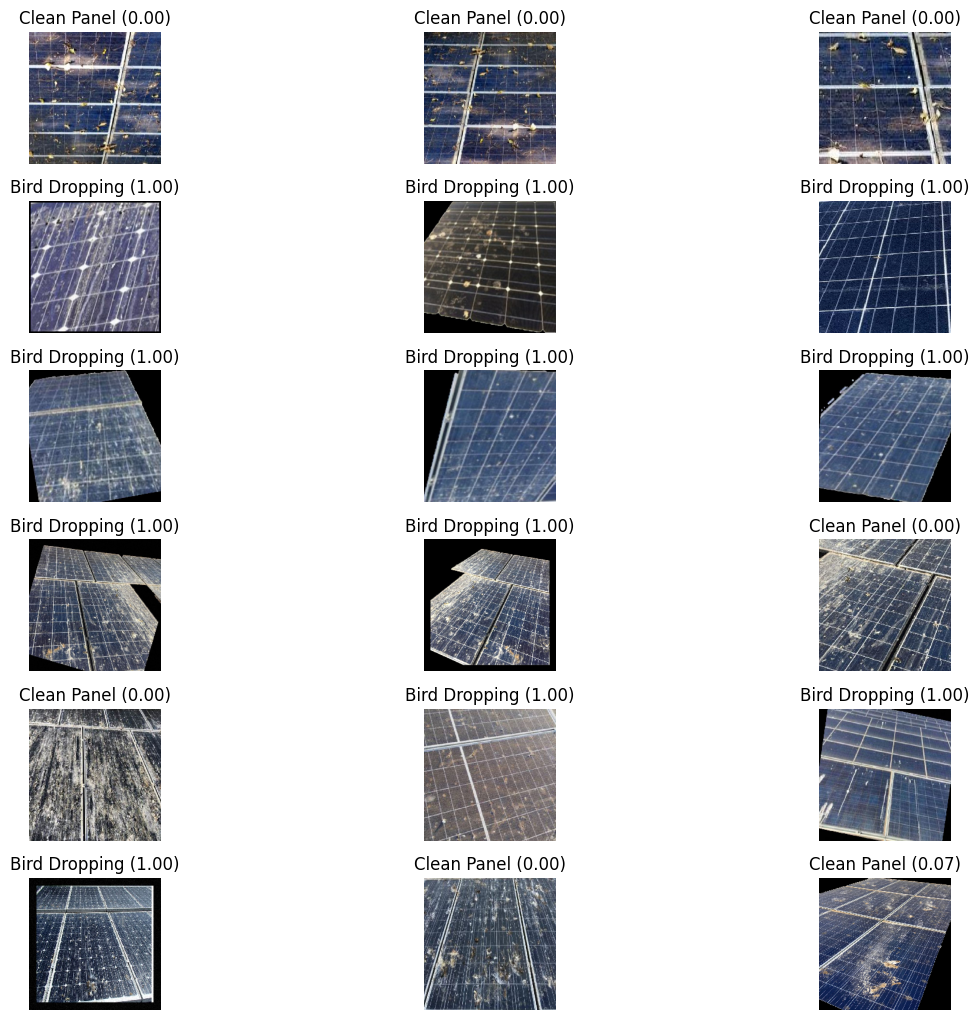

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# ✅ Load your latest fine-tuned model
model = load_model("bird_drop_retrained.h5")

# ✅ Upload multiple images
uploaded = files.upload()

# ✅ Predict and display results
plt.figure(figsize=(12, 12))
for i, fname in enumerate(uploaded.keys()):
    # Load image and preprocess
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)[0][0]
    label = "Bird Dropping" if pred > 0.5 else "Clean Panel"

    # Plot image
    plt.subplot(len(uploaded) // 3 + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{label} ({pred:.2f})")
    plt.axis("off")

plt.tight_layout()
plt.show()


📤 Please upload test images (e.g., BirdDrop1.png, Clean1.jpg)...


Saving 1_aug_0.png to 1_aug_0 (2).png
Saving 1_aug_1.png to 1_aug_1 (2).png
Saving 1_aug_2.png to 1_aug_2 (2).png
Saving 2_aug_2.png to 2_aug_2 (2).png
Saving 2_original.png to 2_original.png
Saving 5_original.png to 5_original (2).png
Saving 6_aug_2.png to 6_aug_2 (2).png
Saving 6_original.png to 6_original (2).png
Saving 7_aug_2.png to 7_aug_2 (2).png
Saving 7_original.png to 7_original.png
Saving 9.png to 9 (2).png
Saving 10.png to 10 (2).png
Saving 11.png to 11 (2).png
Saving 12.png to 12 (2).png
Saving 13.JPG to 13.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━

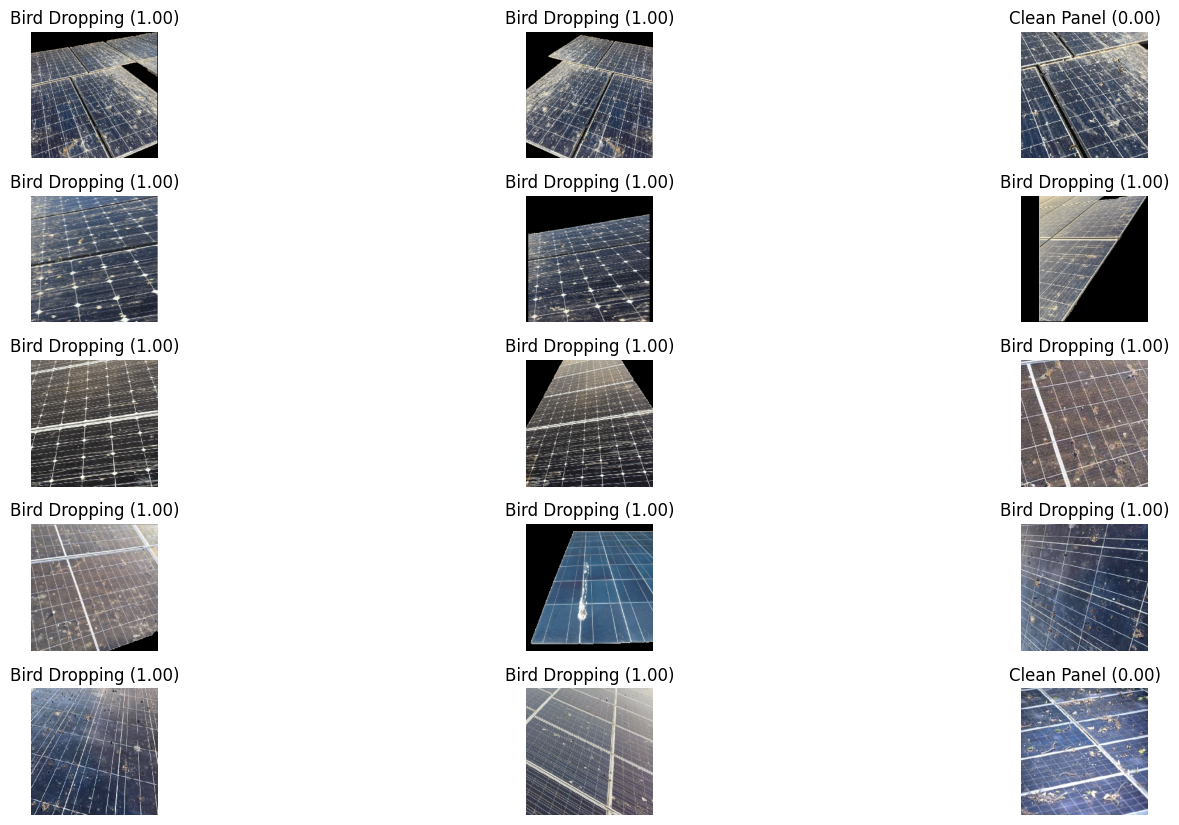

⚠️ Could not compute accuracy — filenames must include 'bird' or 'clean'.
🎉 No misclassifications found.


In [18]:
# === Step 1: Import dependencies ===
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# === Step 2: Load trained model ===
model = load_model("bird_drop_retrained.h5")  # Make sure this is uploaded first

# === Step 3: Upload images ===
print("📤 Please upload test images (e.g., BirdDrop1.png, Clean1.jpg)...")
uploaded = files.upload()

# === Step 4: Predict each image ===
correct = 0
total = 0
threshold = 0.5  # You can tweak this

plt.figure(figsize=(15, 10))
misclassified = []

for i, fname in enumerate(uploaded.keys()):
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    label = "Bird Dropping" if pred > threshold else "Clean Panel"

    # === Determine actual label from filename ===
    fname_lower = fname.lower()
    if "bird" in fname_lower:
        actual = "Bird Dropping"
    elif "clean" in fname_lower:
        actual = "Clean Panel"
    else:
        actual = "Unknown"

    # === Track accuracy ===
    if actual in ["Bird Dropping", "Clean Panel"]:
        total += 1
        if label == actual:
            correct += 1
        else:
            misclassified.append((fname, label, actual, pred))

    # === Display prediction ===
    plt.subplot(len(uploaded) // 3 + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{label} ({pred:.2f})")
    plt.axis("off")

plt.tight_layout()
plt.show()

# === Step 5: Print accuracy summary ===
if total > 0:
    acc = correct / total * 100
    print(f"\n✅ Accuracy: {correct}/{total} = {acc:.2f}%")
else:
    print("⚠️ Could not compute accuracy — filenames must include 'bird' or 'clean'.")

# === Step 6: List misclassified images ===
if misclassified:
    print("\n❌ Misclassified Images:")
    for fname, pred_label, actual_label, conf in misclassified:
        print(f"{fname}: Predicted = {pred_label} ({conf:.4f}), Actual = {actual_label}")
else:
    print("🎉 No misclassifications found.")
